# Predicting diamond prices based on the feature of diamonds.
## Phase 2: Statistical Modelling

#### Group Name: Group 57

#### Name(s) & ID(s) of Group Members:
- Eddie Ton (s3948609)
- Jabbar Baloghlan (s3890406)
- Tyler Xia (s3945694)
- Andy Than (s3947037)
- Huynh Pham (s3946066)

## Table of Contents
- [Introduction](#intro)
- [Statistical Modelling](#sm)
- [Critique & Limitations](#cl)
- [Summary & Conclusions](#sc)

## Introduction <a id='intro'></a>

### Phase 1 Summary

In phase 1, we found the raw data of diamonds from Kaggle (Shivam Agrawal, 2021) which contains various details and properties of diamonds based off the Tiffany & Co's pricelist from 2017. With the data we set to normalised it and clean the data for analysis in which we made various data visualisations with the dataset as to achieve the goal of finding the relation between the diamond's properties and the price of diamonds. In phase 1 it highlighted that clarity, cut and carat seem to have a linear relationship towards the price of the diamonds, in phase 2 we aim to predict the prices of diamonds through these variables.

### Report Overview

The report will focus on adopting the data acquired from the previous phase, use it to create a statistical model, and comment on the findings of the research. It will feature the main driving factors (variates with the biggest impact) to ultimately create models and come up with the best assumptions to finding diamond prices

### Overview of Methodology

For the statistical modelling we will be doing, the best option is Multiple Linear Regression (MLR). It will consist of making predictive equations for each of the variates that affect diamond prices. The expected outcome is to have an exuation in a form of y = k + x1*bi1 + x2*bi2 ... + xn*bin, which could be used to predict diamond prices as closely to the real value as possible.

## Statistical Modelling <a id='sm'></a>

### Full Model Overview

We will be using all features present with a minor focus on color to determine the possibility of linear regression from the data.

#### Module Imports

In [238]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None) 

%matplotlib inline 
%config InlineBackend.figure_format = 'retina'
plt.style.use("ggplot")

df = pd.read_csv('diamonds_no_outliers.csv')
# df = pd.read_csv('diamonds.csv')

#### Data preparation

Before we graph the full model overview, the categorical features will be label encoded as seen in the phase 1 report. Our reasoning for this decision is that, the features have a clear ranking of best to worse. This was demonstrated in the data exploration of price and the features in phase 1.

Other changes:
- The index column was an error that was added by accident in phase 2.

In [239]:
label_df = df.copy()
label_df = label_df.drop(['Unnamed: 0'], axis=1)

label_df.Clarity[label_df.Clarity == 'I1'] = 1
label_df.Clarity[label_df.Clarity == 'SI2'] = 2
label_df.Clarity[label_df.Clarity == 'SI1'] = 3
label_df.Clarity[label_df.Clarity == 'VS2'] = 4
label_df.Clarity[label_df.Clarity == 'VS1'] = 5
label_df.Clarity[label_df.Clarity == 'VVS2'] = 6
label_df.Clarity[label_df.Clarity == 'VVS1'] = 7
label_df.Clarity[label_df.Clarity == 'IF'] = 8

label_df.Cut[label_df.Cut == 'Fair'] = 1
label_df.Cut[label_df.Cut == 'Good'] = 2
label_df.Cut[label_df.Cut == 'Very Good'] = 3
label_df.Cut[label_df.Cut == 'Premium'] = 4
label_df.Cut[label_df.Cut == 'Ideal'] = 5

label_df.Color[label_df.Color == 'J'] = 1
label_df.Color[label_df.Color == 'I'] = 2
label_df.Color[label_df.Color == 'H'] = 3
label_df.Color[label_df.Color == 'G'] = 4
label_df.Color[label_df.Color == 'F'] = 5
label_df.Color[label_df.Color == 'E'] = 6
label_df.Color[label_df.Color == 'D'] = 7

label_df.head(10)

,Carat,Cut,Color,Clarity,Depth,Table,Price,X,Y,Z
0,0.23,5,6,2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,4,6,3,59.8,61.0,326,3.89,3.84,2.31
2,0.29,4,2,4,62.4,58.0,334,4.20,4.23,2.63
3,0.31,2,1,2,63.3,58.0,335,4.34,4.35,2.75
4,0.24,3,1,6,62.8,57.0,336,3.94,3.96,2.48
5,0.24,3,2,7,62.3,57.0,336,3.95,3.98,2.47
6,0.26,3,3,3,61.9,55.0,337,4.07,4.11,2.53
7,0.23,3,3,5,59.4,61.0,338,4.00,4.05,2.39
8,0.30,2,1,3,64.0,55.0,339,4.25,4.28,2.73
9,0.23,5,1,5,62.8,56.0,340,3.93,3.90,2.46


### Feature Selection

To start, we need to create a base formula fitting for our model.

In [240]:
formula_string_indep_vars = ' + '.join(label_df.drop(columns='Price').columns)
formula_string = 'Price ~ ' + formula_string_indep_vars
print('formula_string: ', formula_string)

formula_string:  Price ~ Carat + Cut + Color + Clarity + Depth + Table + X + Y + Z


Now that we have defined our statistical model formula as a Python
string, we fit an OLS (ordinary least squares) model to our encoded
data.

In [241]:
model_full = sm.formula.ols(formula=formula_string, data=label_df)
model_full_fitted = model_full.fit()
print(model_full_fitted.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                 2.280e+04
Date:                Sun, 23 Oct 2022   Prob (F-statistic):               0.00
Time:                        13:06:52   Log-Likelihood:            -4.0220e+05
No. Observations:               48436   AIC:                         8.044e+05
Df Residuals:                   48412   BIC:                         8.047e+05
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     4272.8267    758.053      5.637   

The full model has an adjusted R-squared value of 0.915, which means that 91% of the variance is explained by the model. By looking at the p-values, we observe that the majority of them are highly significant.

Now, well define a new dataframe for predicates and actuals. It will be used to make a scatterplot for residual observation.

In [242]:
residuals_full = pd.DataFrame({'actual': label_df['Price'], 
                               'predicted': model_full_fitted.fittedvalues, 
                               'residual': model_full_fitted.resid})
residuals_full.sample(10)

,actual,predicted,residual
41372,1752,2402.996201,-650.996201
31531,914,1782.663939,-868.663939
46972,2500,3033.263365,-533.263365
29367,833,756.385727,76.614273
8641,4633,4557.195266,75.804734
38083,1343,879.798846,463.201154
3711,3538,4000.277911,-462.277911
16786,7485,6370.846703,1114.153297
8248,4547,5025.338117,-478.338117
35412,1103,1705.102324,-602.102324


Let's plot actual age values vs. predicted values.

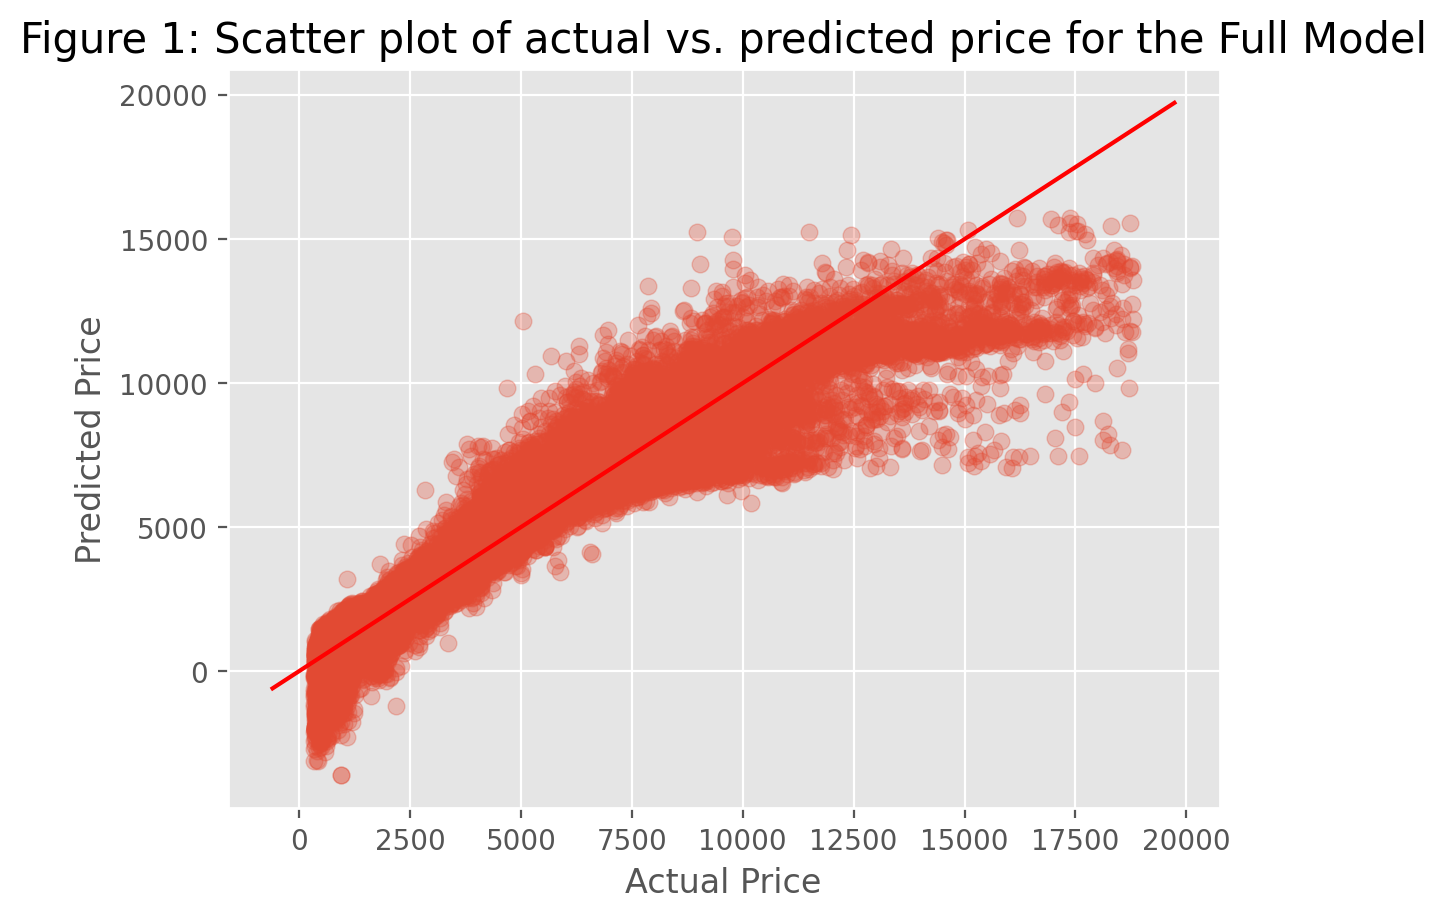

In [243]:
def plot_line(axis, slope, intercept, **kargs):
    xmin, xmax = axis.get_xlim()
    plt.plot([xmin, xmax], [xmin*slope+intercept, xmax*slope+intercept], **kargs)

# Creating scatter plot
plt.scatter(residuals_full['actual'], residuals_full['predicted'], alpha=0.3);
plot_line(axis=plt.gca(), slope=1, intercept=0, c="red");
plt.xlabel('Actual Price');
plt.ylabel('Predicted Price');
plt.title('Figure 1: Scatter plot of actual vs. predicted price for the Full Model', fontsize=15);
plt.show();

From Figure 1, we observe that the model produces most accurate results in ranges 1500-7500 even though after 7500, real values begin to deviate minorly.  

We will now check the diagnostics for the full model.

### Full Model Diagnostic Checks<a href="#Full-Model-Diagnostic-Checks" class="anchor-link"></a>

We would like to check whether there are indications of violations of
the regression assumptions, which are

1.  linearity of the relationship between target variable and the
    independent variables
2.  constant variance of the errors
3.  normality of the residual distribution
4.  statistical independence of the residuals

Let's first get a scatter plot of residuals (as a function of predicted `Price`).

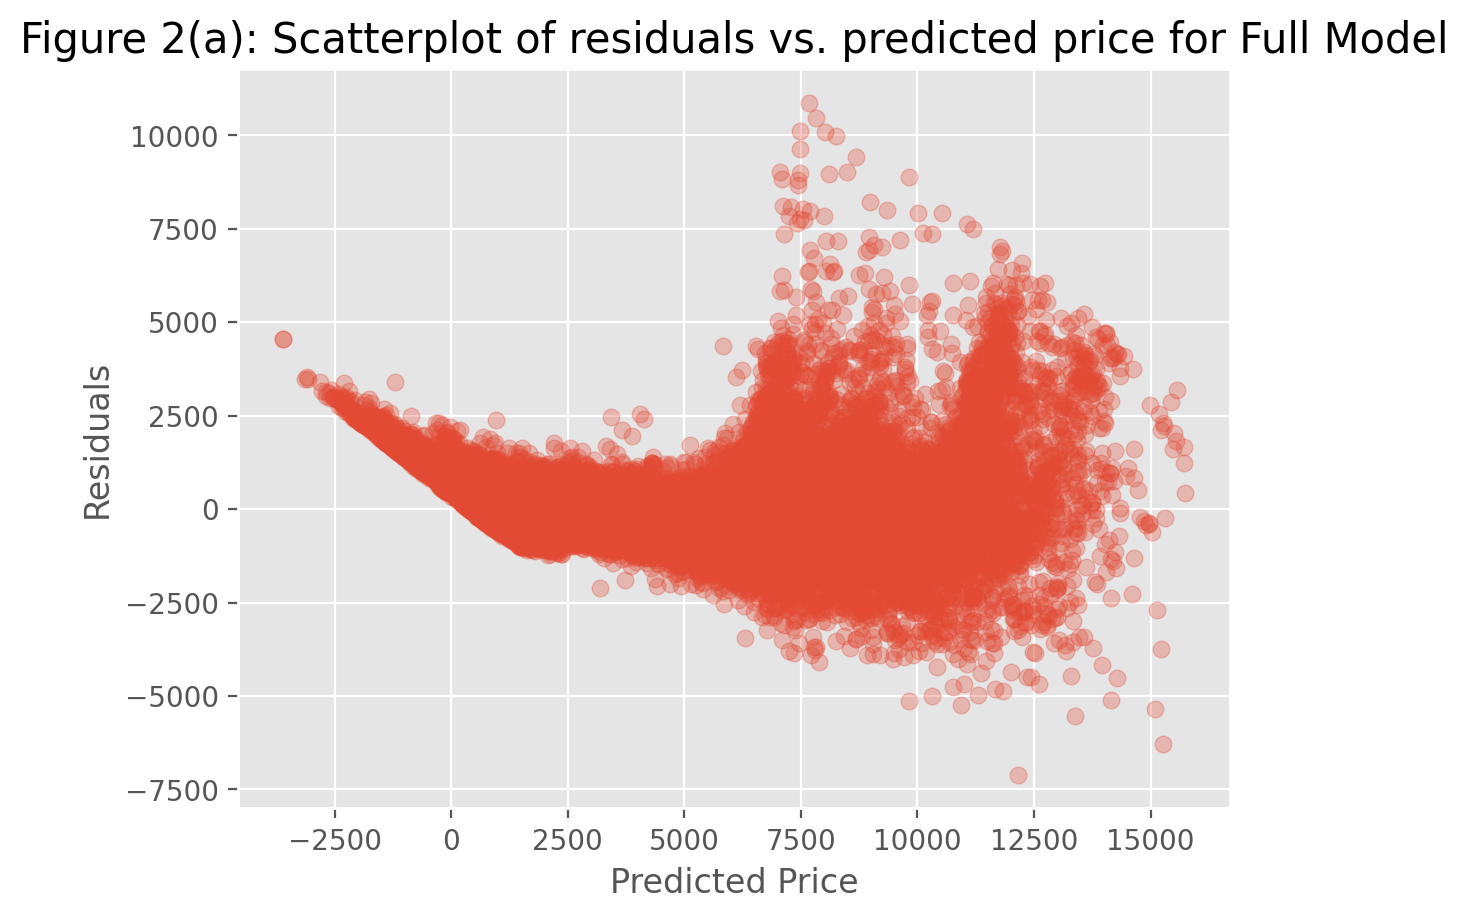

In [244]:
plt.scatter(residuals_full['predicted'], residuals_full['residual'], alpha=0.3);
plt.xlabel('Predicted Price');
plt.ylabel('Residuals')
plt.title('Figure 2(a): Scatterplot of residuals vs. predicted price for Full Model', fontsize=15)
plt.show();

From Figure 2(a), we see that, rather than being mostly random and
centered around 0, the residuals show a expanding pattern, especially
when predicted price is over 7500. This pattern indicates that the constant
variability assumption of linear regression is not quite satisfied in
this case.

Let's now plot actual age vs. residuals.

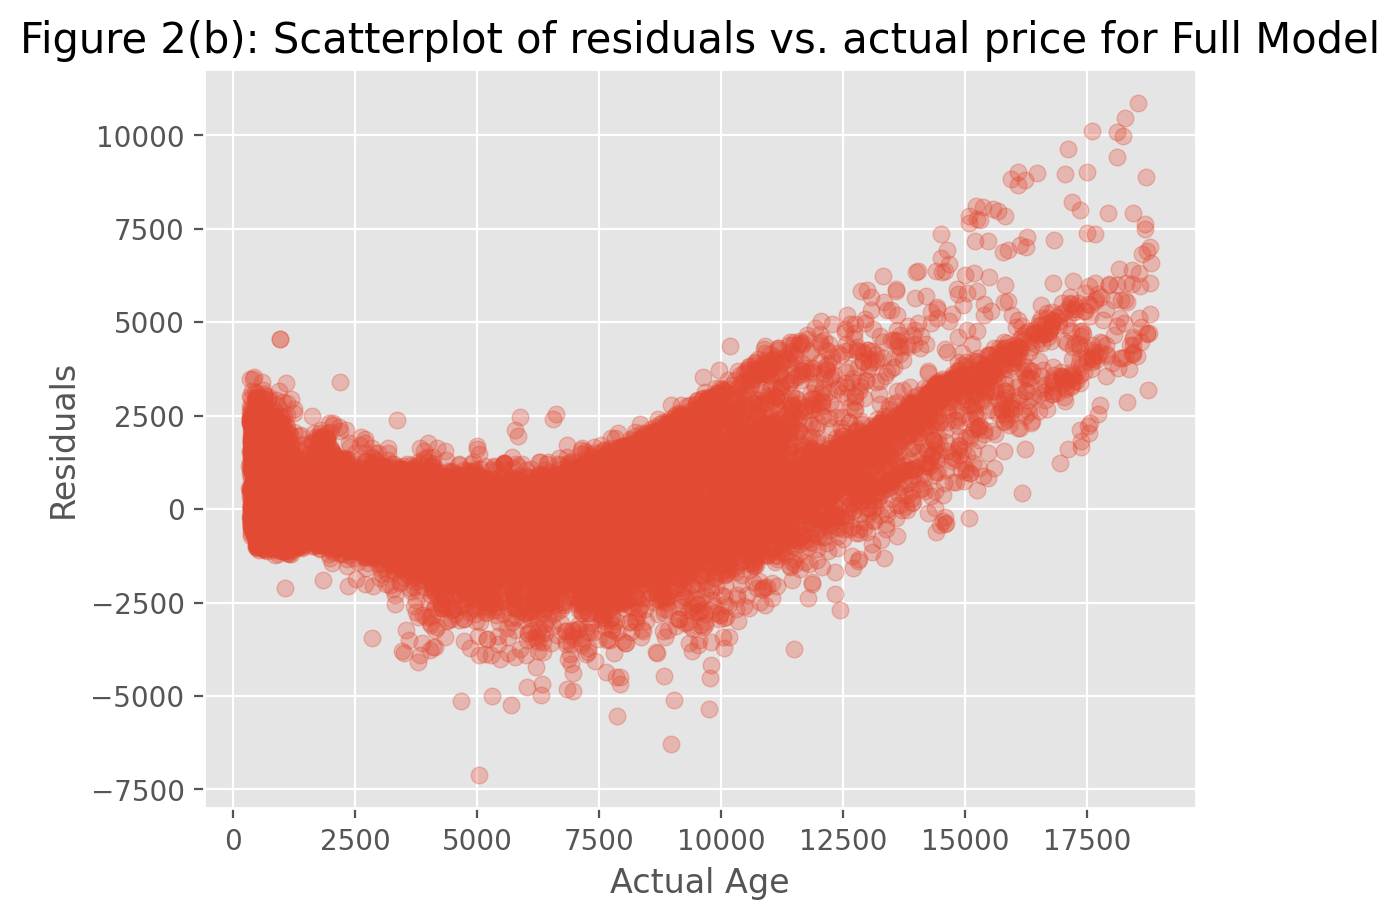

In [245]:
plt.scatter(residuals_full['actual'], residuals_full['residual'], alpha=0.3);
plt.xlabel('Actual Age');
plt.ylabel('Residuals')
plt.title('Figure 2(b): Scatterplot of residuals vs. actual price for Full Model', fontsize=15)
plt.show();

From Figure 2(b), we can see that although it starts as uniformely acceptable, the model starts to falter after the mark of 7500, with residues of up to 2500.

Let's overlay the histograms of actual vs. predicted age on the same plot.

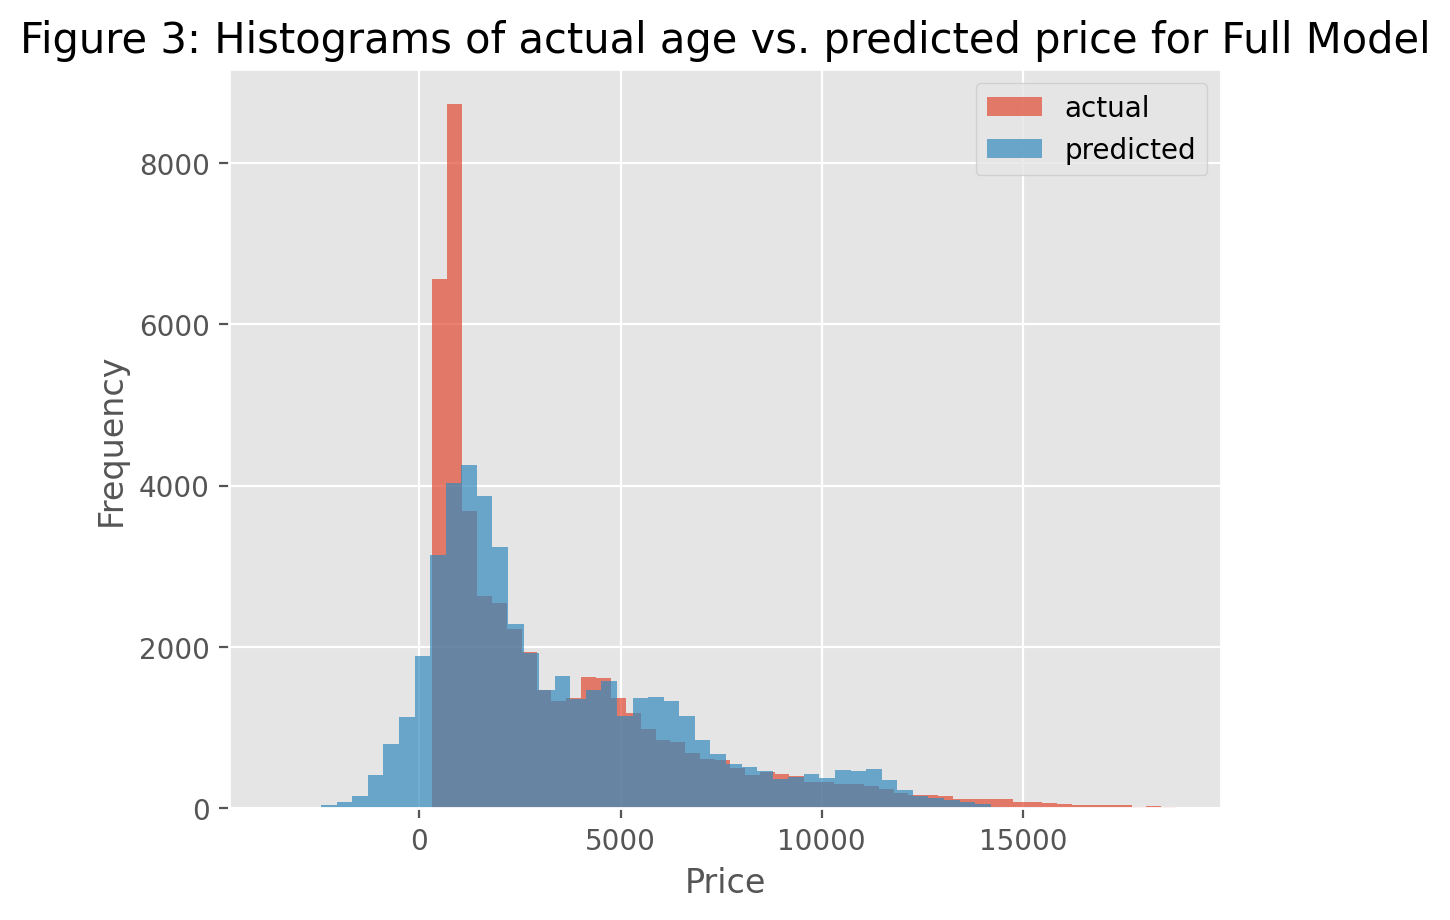

In [246]:
plt.hist(residuals_full['actual'], label='actual', bins=50, alpha=0.7);
plt.hist(residuals_full['predicted'], label='predicted', bins=50, alpha=0.7);
plt.xlabel('Price');
plt.ylabel('Frequency');
plt.title('Figure 3: Histograms of actual age vs. predicted price for Full Model', fontsize=15);
plt.legend()
plt.show();

We notice that in Figure 3 the histogram demo for predicted data is far advertly frequent and somewhat centered, and indicates how it is  focused on ranges of -1000 to 12500, even though real values stretch farm more positively in price, and there are more observations of prices in regions of 0 to 3000.

Let's now have look at the histogram of the residuals.

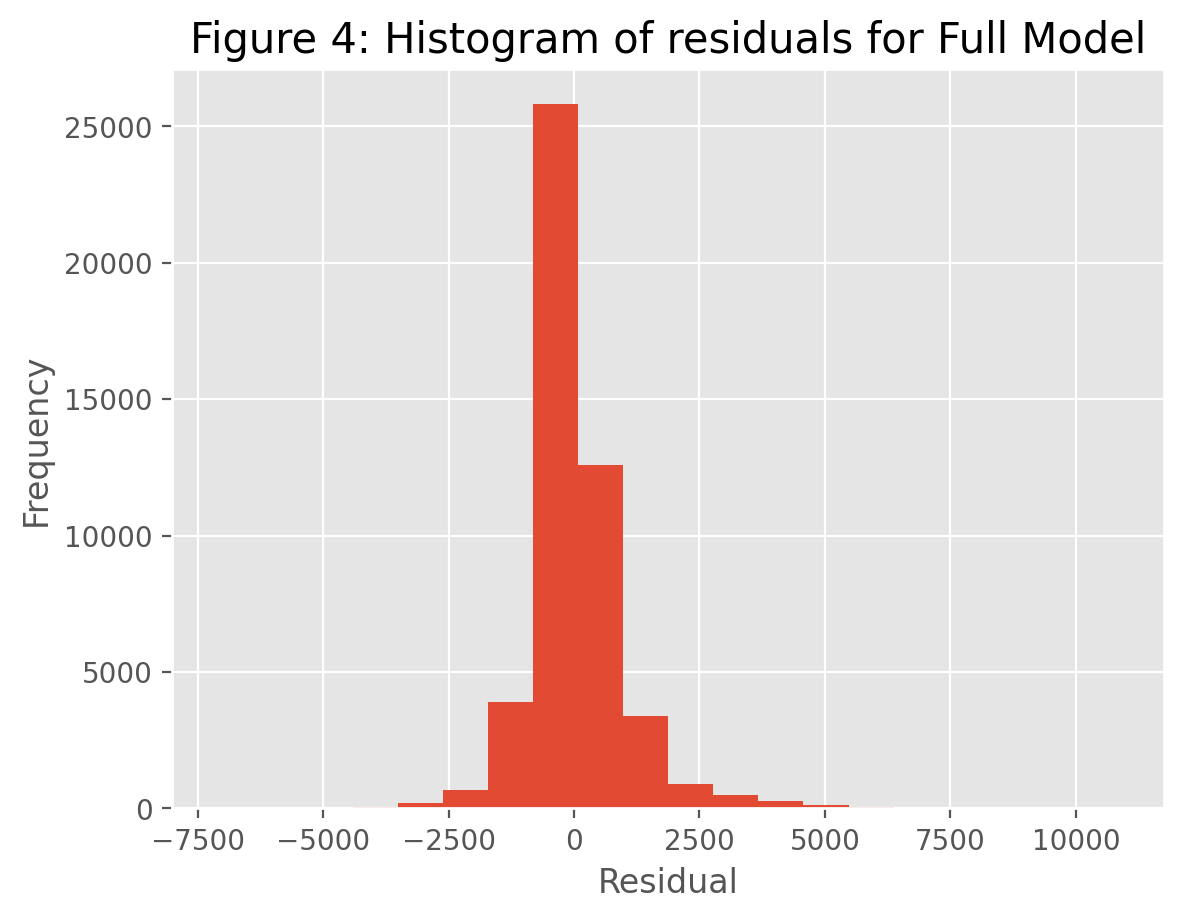

In [247]:
plt.hist(residuals_full['residual'], bins = 20);
plt.xlabel('Residual');
plt.ylabel('Frequency');
plt.title('Figure 4: Histogram of residuals for Full Model', fontsize=15);
plt.show();

From Figure 4, the histogram of residuals looks admittedly symmetric. Quite positively, it seems the normality assumption of linear regression is not significantly violated in this particular case, with residues mainly ranging from -1000 to +1000.

### Reduced Model Overview

Overview of your reduced model, including the variables and terms you are using in your model.

### Reduced Model Diagnostic Checks

You need to check whether there are indications of violations of the regression assumptions for the reduced model.

## Critique & Limitations <a id='cl'></a>

Critique & Limitations of your approach: strengths and weaknesses in detail.

## Summary & Conclusions <a id='sc'></a>

### Project Summary

A comprehensive summary of your entire project (both Phase 1 and Phase 2). That is, what exactly did you do in your project? (Example: I first cleaned the data in such and such ways. And then I applied multiple linear regression techniques in such and such ways. etc).

### Summary of Findings

A comprehensive summary of your findings. That is, what exactly did you find about your particular problem?

### Conclusions

Your detailed conclusions as they relate to your goals and objectives.